# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [1]:
### SOME IMPORTS
import common as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.1) Complete the following distance function

In [2]:
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    squared = 0.0
    for i in range (len(A)):
        squared+=(A[i]-B[i])**2
    return squared**(1/2)
    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

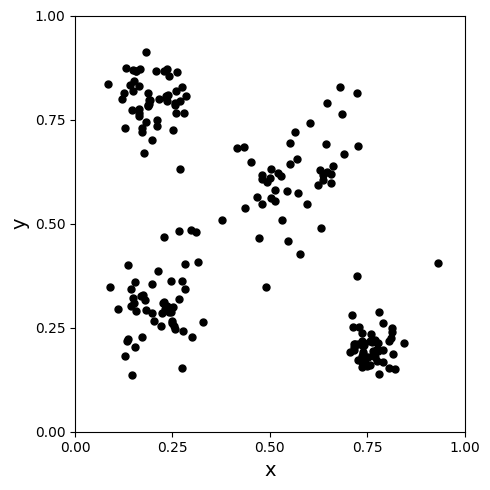

In [3]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

In [4]:
print("I can see 4 clusters")

I can see 4 clusters


The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

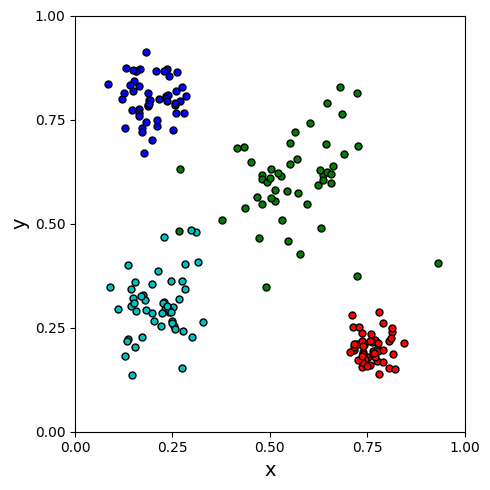

In [5]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [6]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    np.random.shuffle(data)
    centroids = data[:K]  # Select the first K points as centroids
    return centroids

1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [7]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):
    NO_CHANGE = True
    M = np.array(DATA).shape[1]
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for _ in range(K)]
    for i in range(len(DATA)):
        distances = [getEuclideanDistance(DATA[i], centroid) for centroid in CENTROIDS]
        closest_index = distances.index(min(distances))
        NEW_ASSIGNMENTS[closest_index].append(i)

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    for k in range(K):  
        centroid_sum = [0] * M
        for data_index in NEW_ASSIGNMENTS[k]:
            for m in range(M):
                centroid_sum[m] += DATA[data_index][m]
        centroid = []
        for coordinate_sum in centroid_sum:
            if(len(NEW_ASSIGNMENTS[k])>0):
                centroid.append(coordinate_sum / len(NEW_ASSIGNMENTS[k]))
            else:
                centroid.append(DATA[0])
        #centroid = [coordinate_sum / len(NEW_ASSIGNMENTS[k]) for coordinate_sum in centroid_sum]
        NEW_CENTROIDS.append(centroid)
    
    if ASSIGNMENTS is None:
        NO_CHANGE = False
    else:
        NO_CHANGE = (ASSIGNMENTS == NEW_ASSIGNMENTS)
    
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS


1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

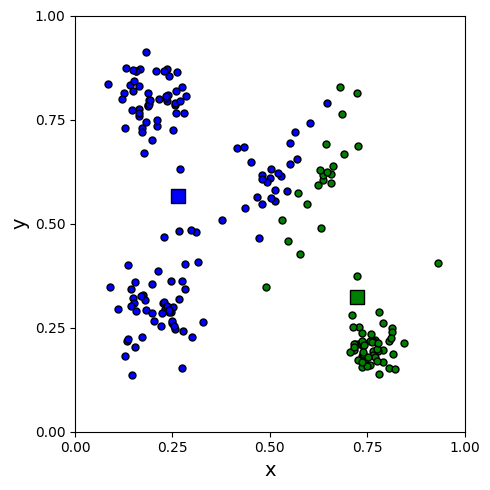

In [8]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

Stopped after 7 Iterations


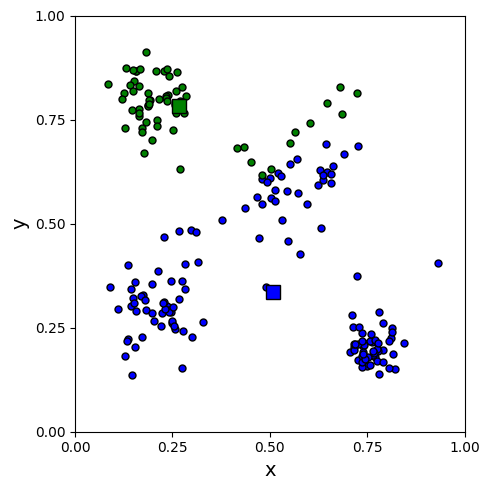

In [9]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = [[] for i in range(K)] 
    iter = 100
    for i in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        if(NO_CHANGE == True):
            iter = i+1
            break
    if(display==True):
        print(f"Stopped after {i} Iterations")
        cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)
    return DATA, CENTROIDS, ASSIGNMENTS   

DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = 2)

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

Answer: 4

Stopped after 9 Iterations


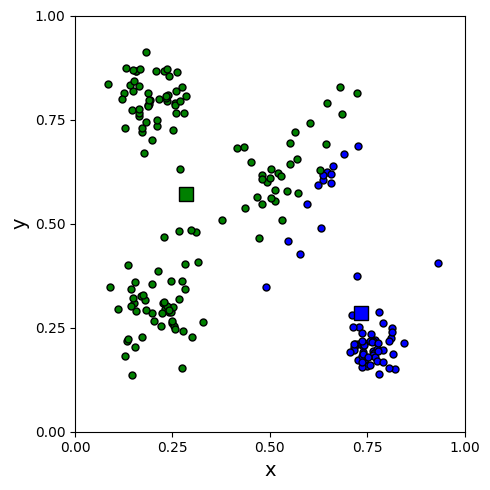

Stopped after 5 Iterations


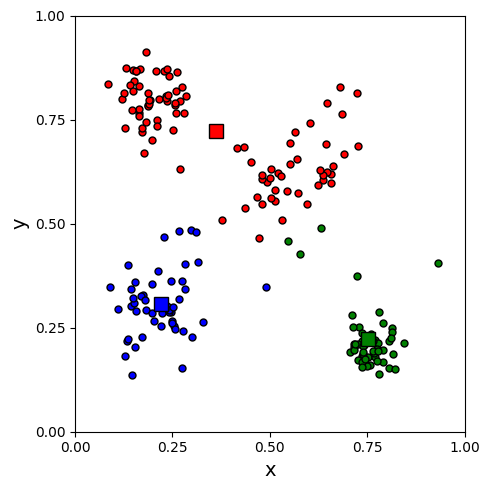

Stopped after 4 Iterations


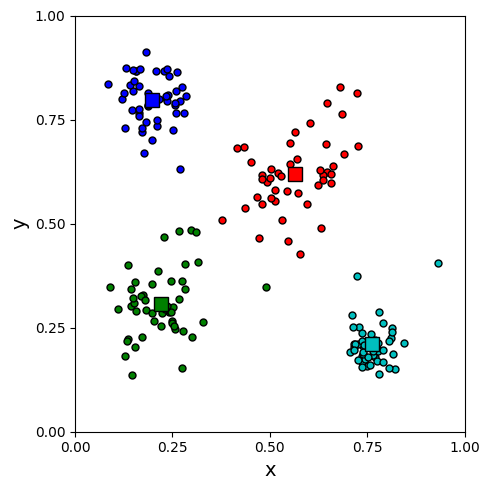

Stopped after 10 Iterations


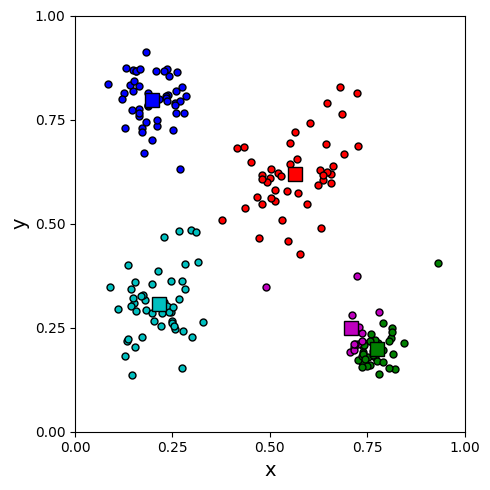

Stopped after 6 Iterations


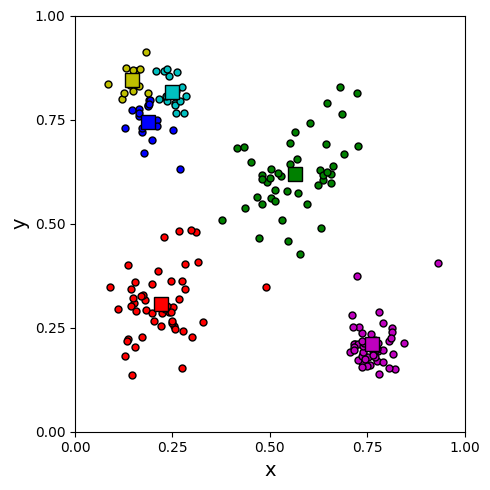

Stopped after 3 Iterations


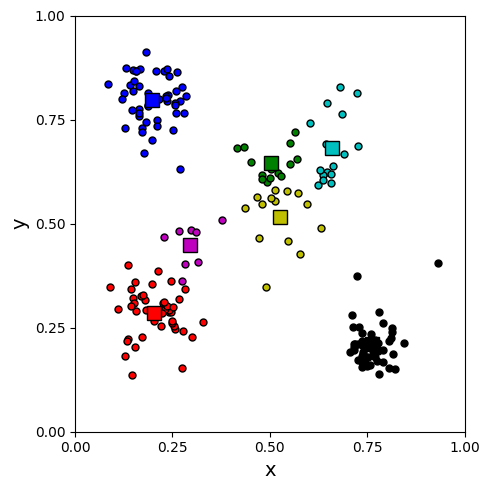

Stopped after 11 Iterations


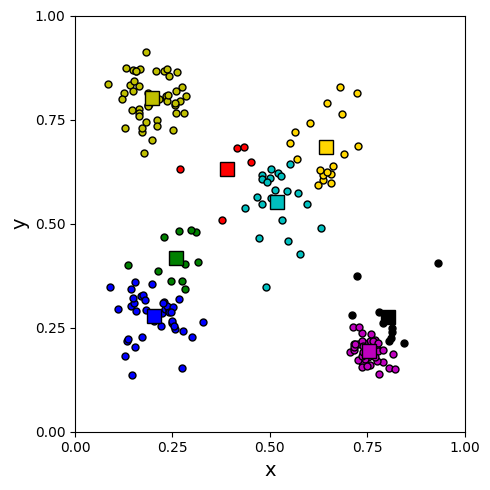

Stopped after 7 Iterations


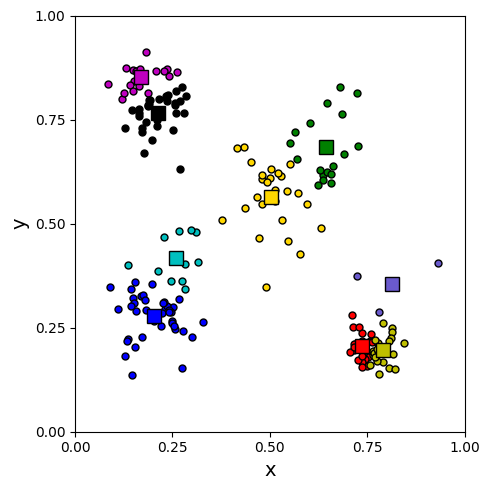

Stopped after 7 Iterations


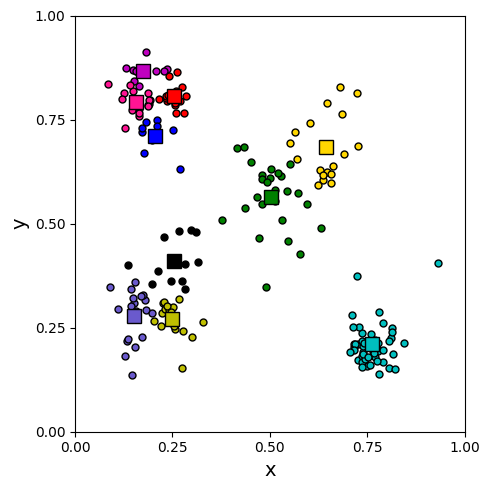

In [10]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k, M = 2)

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

In [11]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    total = 0.0
    for k in range(len(CENTROIDS)):
        for data_index in ASSIGNMENTS[k]:
            total+=getEuclideanDistance(CENTROIDS[k], DATA[data_index])
    return total

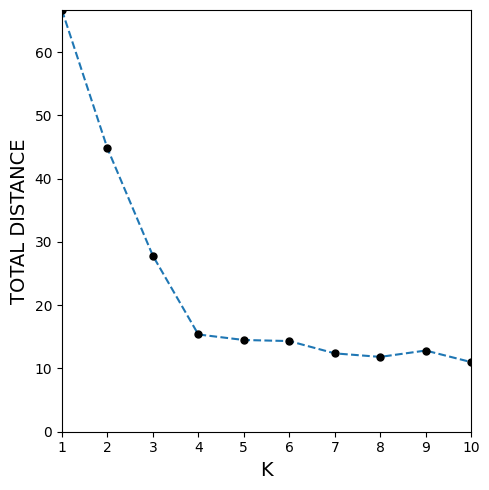

Best K value: 4


In [12]:
def FindBestK(DATA):
    results = []
    m = np.array(DATA).shape[1]
    for k in range(1, 11):
        CENTROIDS = getCentroids(k, DATA)
        DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k, M = m, display=False)
        total_distance = getTotalDistance(DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS)
        results.append([k, total_distance, NEW_CENTROIDS, NEW_ASSIGNMENTS])

    cm.displayResults(plt, results)

    distances = np.array(results, dtype='object')[:, 1]
    # Method: Greatest Perpendicular Distance to the line segment formed by the first and last point
    x1, y1 = 1, distances[1]
    x2, y2 = len(distances) - 1, distances[-1]
    
    max_perpendicular_distance = -1
    elbow_point = None
    
    for i in range(1, len(distances) - 1):
        x0, y0 = i, distances[i]
        perpendicular_distance = np.abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        if perpendicular_distance > max_perpendicular_distance:
            max_perpendicular_distance = perpendicular_distance
            elbow_point = i
    
    print(f"Best K value: {elbow_point + 1}")
    return elbow_point, results[elbow_point][2], results[elbow_point][3]


DATA = cm.getTestDataSet()
best, CENTROIDS, ASSIGNMENTS = FindBestK(DATA)


# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [13]:
DATA = cm.getCaseDataSet()

In [14]:
### CONSIDER NORMALIZATION HERE
data_array = np.array(DATA)

# Calculate the min and max values for each column
min_values = np.min(data_array, axis=0)
max_values = np.max(data_array, axis=0)

normalized_data = (data_array - min_values) / (max_values - min_values)
num_columns = data_array.shape[1]

In [15]:
def doKMeans_CaseStudy(DATA, K = 2, M = 5):
    CENTROIDS = getCentroids(K, DATA) # GET CENTROIDS
    ASSIGNMENTS = [[] for i in range(K)] 
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = K, M = M, display=False)
    return DATA, CENTROIDS, ASSIGNMENTS 

DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(data_array, K = 2)

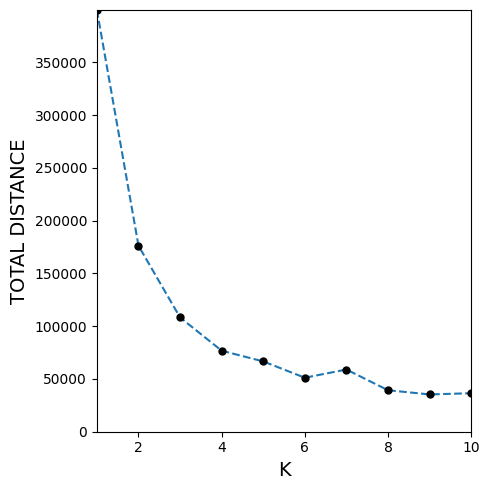

Best K value: 4


In [16]:
### DO THE ANALYSIS HERE (FIND ELBOW)
bestK, CENTROIDS, ASSIGNMENTS = FindBestK(DATA_N)

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

In [17]:
def calculate_cluster_stats(DATA, CENTROIDS, ASSIGNMENTS):
    cluster_stats = []

    for cluster_idx, centroid_indices in enumerate(ASSIGNMENTS):
        cluster_data = DATA[centroid_indices]
        cluster_mean = np.mean(cluster_data, axis=0)
        cluster_max = np.max(cluster_data, axis=0)
        cluster_min = np.min(cluster_data, axis=0)
        cluster_std = np.std(cluster_data, axis=0)

        stats = {
            'Cluster Index': cluster_idx,
            'Age Mean': cluster_mean[0],
            'Salary Mean': cluster_mean[1],
            'Health Index Mean': cluster_mean[2],
            'Time Work/Study Mean': cluster_mean[3],
            'Time Sport Mean': cluster_mean[4],
            'Age Max': cluster_max[0],
            'Salary Max': cluster_max[1],
            'Health Index Max': cluster_max[2],
            'Time Work/Study Max': cluster_max[3],
            'Time Sport Max': cluster_max[4],
            'Age Min': cluster_min[0],
            'Salary Min': cluster_min[1],
            'Health Index Min': cluster_min[2],
            'Time Work/Study Min': cluster_min[3],
            'Time Sport Min': cluster_min[4],
            'Age Std Dev': cluster_std[0],
            'Salary Std Dev': cluster_std[1],
            'Health Index Std Dev': cluster_std[2],
            'Time Work/Study Std Dev': cluster_std[3],
            'Time Sport Std Dev': cluster_std[4]
        }
        cluster_stats.append(stats)

    return cluster_stats

cluster_stats = calculate_cluster_stats(DATA_N, CENTROIDS, ASSIGNMENTS)


In [18]:
df = pd.DataFrame(cluster_stats)

df_formatted = df.set_index('Cluster Index').T
print(df_formatted)


Cluster Index                      0            1            2            3
Age Mean                   44.254089    42.766615    37.063593    39.155277
Salary Mean              2431.492091  2782.256043  2327.663609  2288.529170
Health Index Mean          46.719801    50.493133    54.853418    52.609034
Time Work/Study Mean       28.746308    32.385331    29.117783    30.286633
Time Sport Mean             5.111283     6.076934     6.379431     6.491552
Age Max                    79.599124    76.502845    74.484737    76.080482
Salary Max               6675.942238  6756.885293  6457.236282  6784.101926
Health Index Max           99.385472    98.023256    98.089866    99.881408
Time Work/Study Max        58.423900    59.982863    59.768191    59.334185
Time Sport Max             18.535911    19.538266    17.189463    19.478248
Age Min                    15.316642    15.012362    16.517478    15.370561
Salary Min                124.862784   106.340296    52.939667     5.682016
Health Index

Cluster 0: People in this group have an average age of around 44, earning an average salary of $2431. They seem to focus less on sports, with a moderate emphasis on work/study time. Their health index is around 46-47 on average.

Cluster 1: This cluster consists of individuals slightly younger on average, around 43 years old, earning an average salary of $2782. They seem to prioritize both work/study and sports, allocating more time to these activities. Their health index is higher than the other clusters, averaging around 50.

Cluster 2: People here are the youngest, averaging around 37 years old, with an average salary of $2327. They dedicate a moderate amount of time to sports and work/study activities. Surprisingly, they have the highest average health index among the clusters, around 55.

Cluster 3: This group includes individuals with an average age of approximately 39 and an average salary of $2288. They allocate moderate time to work/study and sports, similar to Cluster 2. Their health index is also high, around 53 on average.